In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
from sklearn.linear_model import Perceptron

In [3]:
data = load_breast_cancer()
X = data.data
y = data.target

df = pd.DataFrame(X, columns=data.feature_names)
df['target'] = y

selected_features = ['mean radius', 'mean texture']
X_selected = df[selected_features].values
y_selected = y  # 0 = malignant, 1 = benign

In [4]:
# Split data to 80% train and 20% test:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y_selected, test_size=0.2, random_state=42, stratify=y_selected
)

print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")

Training samples: 455
Testing samples: 114


In [5]:
# convert labels: 0 -> -1, 1 -> 1
y_train_perceptron = np.where(y_train == 0, -1, 1)
y_test_perceptron = np.where(y_test == 0, -1, 1)

In [7]:
perceptron = Perceptron(tol=1e-3, eta0=0.01)

perceptron.fit(X_train, y_train_perceptron)

print(f"Final Weights: {perceptron.coef_}")
print(f"Final Bias: {perceptron.intercept_[0]}")

Final Weights: [[-0.45344  0.0571 ]]
Final Bias: 5.139999999999935


In [8]:
errors = []
for _ in range(1, 1001):
    perceptron.partial_fit(X_train, y_train_perceptron)
    errors.append(perceptron.score(X_train, y_train_perceptron))

In [9]:
  # Calculate misclassifications (assuming binary classification)
  predictions = perceptron.predict(X_train)
  misclassified = np.sum(predictions != y_train_perceptron)

  # Append accuracy (assuming higher score indicates better performance)
  errors.append(perceptron.score(X_train, y_train_perceptron))

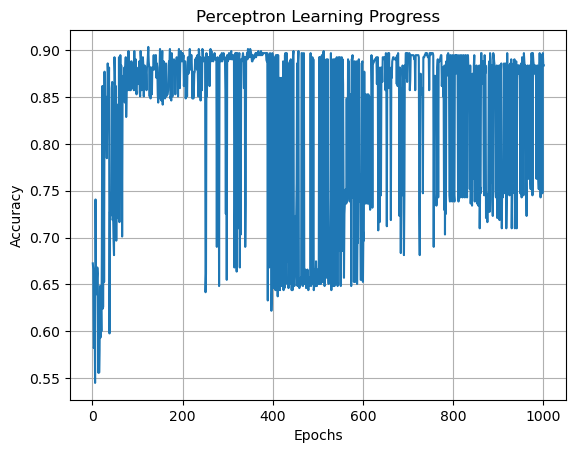

In [18]:
plt.plot(range(1, len(errors) + 1), errors)  # Plot accuracy
plt.xlabel('Epochs')
plt.ylabel('Accuracy')  # Update label for accuracy
plt.title('Perceptron Learning Progress')
plt.grid(True)
plt.show()

In [11]:
from matplotlib.colors import ListedColormap

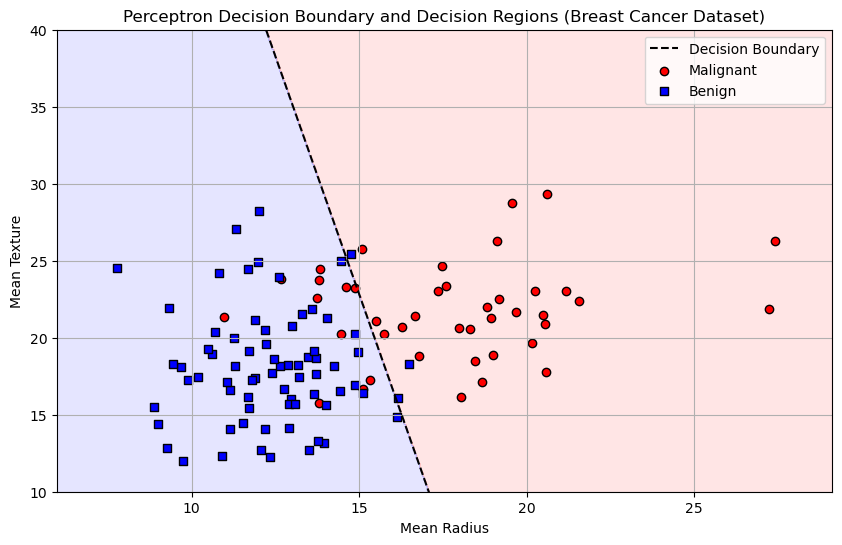

In [12]:
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

grid = np.c_[xx.ravel(), yy.ravel()]
Z = perceptron.predict(grid)
Z = Z.reshape(xx.shape)

cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#0000FF'])

plt.figure(figsize=(10, 6))

plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_light)

if perceptron.coef_[0][1] != 0:
    x_vals = np.array([x_min, x_max])
    y_vals = -(perceptron.coef_[0][0] * x_vals + perceptron.intercept_[0]) / perceptron.coef_[0][1]
    plt.plot(x_vals, y_vals, 'k--', label='Decision Boundary')
else:
    x_val = -perceptron.intercept_[0] / perceptron.coef_[0][0]
    plt.axvline(x=x_val, color='k', linestyle='--', label='Decision Boundary')

# Malignant: 0 (red), Benign: 1 (blue)
plt.scatter(X_test[y_test == 0, 0], X_test[y_test == 0, 1],
            color='red', marker='o', edgecolor='k', label='Malignant')
plt.scatter(X_test[y_test == 1, 0], X_test[y_test == 1, 1],
            color='blue', marker='s', edgecolor='k', label='Benign')

plt.ylim(10,40)
plt.xlabel('Mean Radius')
plt.ylabel('Mean Texture')
plt.title('Perceptron Decision Boundary and Decision Regions (Breast Cancer Dataset)')
plt.legend()
plt.grid(True)
plt.show()